In [6]:
from commonfunctions import *
import numpy as np
import cv2
import math
import timeit
%matplotlib inline
%load_ext autoreload
%autoreload 2

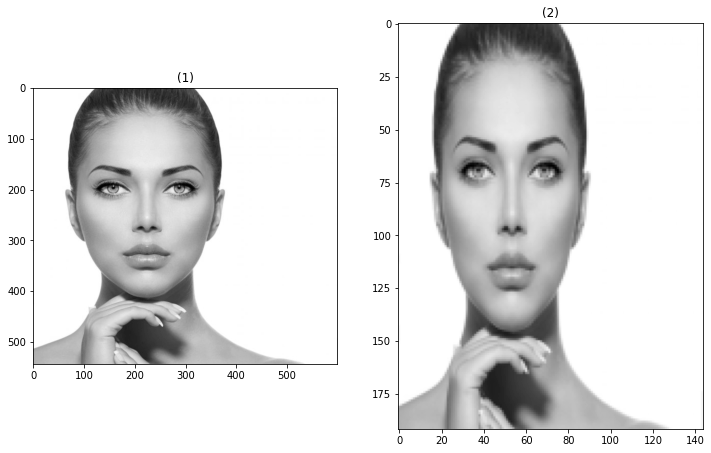

In [7]:
img = rgb2gray(io.imread('test_images\woman.jpg'))

resized = cv2.resize(img, (144,192), interpolation = cv2.INTER_AREA)
show_images([img,resized])

In [86]:
def HOG_descriptor(img):
    resized = cv2.resize(img, (48,64), interpolation = cv2.INTER_AREA)
    mag,angle=gradient(resized)
#     print(resized.shape)
    
    #loop on mag and angle to get 16*16 cell
    windowsize_r =16
    windowsize_c =16
    bin_size=20
    mag_cells=[]
    ang_cells=[]

    
    #check code image on what`s app for efficient split
    
    #TODO make 2d
    
#     for r in range(0,mag.shape[0] - windowsize_r, windowsize_r):
#         temp_mag=[]
#         temp_angle=[]
#         for c in range(0,mag.shape[1] - windowsize_c, windowsize_c):  
            
#             temp_mag.append(mag[r:r+windowsize_r,c:c+windowsize_c])
#             temp_angle.append(angle[r:r+windowsize_r,c:c+windowsize_c])
        
#         mag_cells.append(temp_mag)
#         ang_cells.append(temp_angle)  

    #get 16*16 cells
    
    start = timeit.default_timer()
    mag_cells=cut_image(mag,windowsize_r,windowsize_c)
    ang_cells=cut_image(angle,windowsize_r,windowsize_c)
    print((mag_cells.shape[0],mag_cells.shape[1],-1))
    #mag_cells=np.resize(mag_cells,(mag_cells.shape[0],mag_cells.shape[1],-1))
    #ang_cells=np.resize(ang_cells,(mag_cells.shape[0],mag_cells.shape[1],-1))
    #mag_ang_cells=np.concatenate([mag_cells, ang_cells],axis=-1)
    #print(mag_ang_cells.shape)
    #stop = timeit.default_timer()
    #print("cutting",stop-start)
    
#     print(mag_cells.shape)
#     show_images([mag_cells[1][0],mag_cells[1][1],mag_cells[1][2],mag_cells[1][3]])
    
    #histogram of each cell
    hist=np.zeros((mag_cells.shape[0], mag_cells.shape[1],180//bin_size))
    #start = timeit.default_timer()
    #print(mag_cells.shape)
    start = timeit.default_timer()
    for r in range(mag_cells.shape[0]):
        for  c in range(mag_cells.shape[1]):
            hist[r][c]=HOG_histogram(mag_cells[r][c],ang_cells[r][c], bin_size)
    stop = timeit.default_timer()
    #print("hist",stop-start)
    #start = timeit.default_timer()
    #hist=np.apply_along_axis(HOG_histogram, -1, mag_ang_cells)
    #stop = timeit.default_timer()
    print(stop-start)
    
    
    start = timeit.default_timer()
    norm_hist=[]
    for r in range(hist.shape[0]-1):
        for  c in range(hist.shape[1]-1):
            temp=hist[r:r+2, c:c+2].reshape(-1)
            temp/=np.linalg.norm(temp)
            norm_hist+=list(temp)
    norm_hist=np.asarray(norm_hist) 
    stop = timeit.default_timer()
    #print("averaging",stop-start)
#     print('size of hist',hist.shape)
#     print('size of norm_hist',norm_hist.shape)
#     print(hist)
    return norm_hist
   
    
 
    

In [87]:
def cut_image(img,windowsize_r,windowsize_c):
    tiles=[]
    img_r=img.shape[0]
    img_c=img.shape[1]
    tiles=img.reshape(img_r//windowsize_r,
                      windowsize_r,
                     img_c//windowsize_c,
                     windowsize_c)
    tiles=tiles.swapaxes(1,2)
    return tiles

In [88]:
def HOG_histogram(mag,angle,bin_size=20):
    start = timeit.default_timer()
    #mag=mag_angle[:mag_angle.shape[0]//2]
    #angle=mag_angle[mag_angle.shape[0]//2:]
    hist=np.zeros(int(180/bin_size))
    low_bins=20*(angle//20)
    
    high_bins=20+low_bins
    
    ## weights
    weight_low_bin=(abs(high_bins-angle)/20)*mag
    weight_high_bin=(abs(angle-low_bins)/20)*mag
    
    
    high_bins=high_bins%180
    for i in range(hist.shape[0]):
        
        votes_low=np.sum(weight_low_bin[(low_bins//20)==i])
        votes_high=np.sum(weight_high_bin[(high_bins//20)==i])
        hist[i]=votes_low+votes_high
    stop = timeit.default_timer()
    print(stop-start)
    return hist 
#     print(np.sum(mag))

#     print(np.sum(hist))

    
    
    

In [89]:
#cell is a matrix 8x8
def gradient(img):
    img=np.float32(img) / 255.0
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

#     show_images([gx,gy,mag,angle],["gx","gy","mag","angle"])
#     print("mag",np.sum(mag))
    return mag,angle%180

    
    

In [90]:
from skimage import data, color, feature,transform
start = timeit.default_timer()
print(HOG_descriptor(img))
stop = timeit.default_timer()
print(stop-start)
start = timeit.default_timer()
print(feature.hog(cv2.resize(img, (48,64), interpolation = cv2.INTER_AREA),cells_per_block=(2,2),pixels_per_cell=(16, 16)).shape)
end = timeit.default_timer()
print(end-start)

(4, 3, -1)
0.0005584999998973217
0.0005428999998002837
0.0009826000000430213
0.0004809000001841923
0.0007950999997774488
0.0004984000001968525
0.0004582999999911408
0.00046380000003409805
0.0004453999999896041
0.00045799999998052954
0.0004687000000558328
0.00043559999994613463
0.00978239999994912
[3.80960304e-01 3.36877402e-01 1.69861268e-01 6.74182848e-02
 5.08981425e-02 7.60795533e-03 0.00000000e+00 3.65233305e-04
 9.48805627e-03 3.40926204e-01 1.04242470e-02 2.44595594e-03
 5.43743491e-03 3.78325272e-02 9.02577644e-02 1.09503373e-01
 1.55070722e-01 3.43230957e-01 3.24132304e-01 1.32203511e-01
 4.56204484e-02 3.91851057e-02 6.59141864e-02 1.07690438e-01
 8.52455344e-02 6.51637762e-02 2.08821876e-01 3.44359334e-01
 2.19761920e-01 6.86211079e-02 1.04378843e-01 1.01770842e-01
 7.85796030e-02 5.68762651e-02 5.29247255e-02 1.52249137e-01
 4.78312982e-01 1.46250203e-02 3.43162968e-03 7.62861778e-03
 5.30783163e-02 1.26629927e-01 1.53631150e-01 2.17561274e-01
 4.81546505e-01 1.78069066e-03 

In [68]:
from sklearn.datasets import fetch_lfw_people
from skimage import data, color, feature,transform
from  sklearn.feature_extraction.image import PatchExtractor

faces = fetch_lfw_people()

In [9]:
# SVM

#positive data
positive_patches = faces.images
print(positive_patches.shape)


imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]


(13233, 62, 47)


<ipython-input-9-00e0f3567f46>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  images = [color.rgb2gray(getattr(data, name)())


In [10]:
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

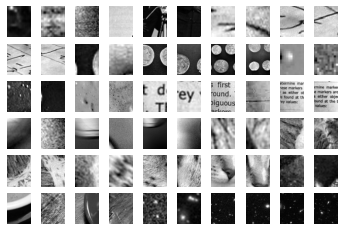

In [11]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [12]:
from itertools import chain
X_train = np.array([HOG_descriptor(im)
                    for im in chain(positive_patches, negative_patches)])

# add labels
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

KeyboardInterrupt: 

In [17]:
y_train = np.zeros(X_train2.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [22]:
from itertools import chain
X_train2 = np.array([feature.hog(cv2.resize(im, (48,64), interpolation = cv2.INTER_AREA),cells_per_block=(2,2),pixels_per_cell=(16, 16))
                    for im in chain(positive_patches, negative_patches)])

# # add labels
# y_train2 = np.zeros(X_train2.shape[0])
# y_train[:positive_patches.shape[0]] = 1

In [25]:
#print(X_train.shape)
print(X_train2.shape)
#print(X_train[0])
print(HOG_descriptor(positive_patches[0]))

(43233, 216)
[0.35228668 0.36792583 0.2215744  0.10520636 0.09203483 0.10656079
 0.07036886 0.02265676 0.03643044 0.03225074 0.03138212 0.08891959
 0.08115815 0.07832351 0.10688566 0.14841909 0.05918661 0.02550261
 0.38653894 0.25374788 0.11809531 0.16447649 0.26158844 0.15827211
 0.03572182 0.05232537 0.19912394 0.22500954 0.20211311 0.09604017
 0.04397855 0.06550356 0.03666318 0.07744436 0.12559385 0.26739236
 0.03504756 0.03410362 0.09663081 0.08819629 0.08511583 0.11615493
 0.16129018 0.06431935 0.02771422 0.24492377 0.06634386 0.05744448
 0.10185001 0.0630927  0.03006361 0.06323451 0.23409797 0.45689422
 0.24452266 0.21964062 0.1043689  0.04779243 0.07118412 0.03984266
 0.08416043 0.13648551 0.29058097 0.39168258 0.13326623 0.05407262
 0.08461041 0.21047498 0.1629128  0.17408    0.13370654 0.20010876
 0.31594762 0.20740741 0.09652826 0.13443912 0.21381609 0.12936781
 0.02919816 0.0427695  0.16275911 0.18391738 0.16520239 0.07850092
 0.03594701 0.05354104 0.0299676  0.06330115 0.10

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection  import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), X_train2, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train2, y_train)
print('svm',grid.best_score_)

gaussian [0.97397941 0.97710189 0.95917659 0.98207263 0.98033773]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.9896839170700202


In [ ]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(grid, filename)

In [ ]:
grid.predict(io.imread('test_images\woman.jpg')

In [ ]:
import joblib
filename = 'finalized_model.sav'
loaded_model = joblib.load(filename)
from skimage import data, color, feature,transform
x=loaded_model.predict(feature.hog(cv2.resize(io.imread('test_images\woman.jpg'), (48,64), interpolation = cv2.INTER_AREA),cells_per_block=(2,2),pixels_per_cell=(16, 16)).reshape(1,-1))
print(x)

In [ ]:
def search_for_face(img,division_factor1,division_factor2,step):
    x,y=img.shape
    l,w=(int(img.shape[0]/division_factor1),int(img.shape[1]/division_factor2))
    print("mememem")
    for row in range(0,x-l,step):
        for col in range(0,y-w,step):
            #print(l,w)
            #print("hehhh")
            partition=img[row:row+l,col:col+w]
            show_images([partition])
            prediction=loaded_model.predict(HOG_descriptor(cv2.resize(partition, (48,64), interpolation = cv2.INTER_AREA),cells_per_block=(2,2),pixels_per_cell=(16, 16)).reshape(1, -1),)
            if prediction!=0:
                print(prediction)
            

mememem


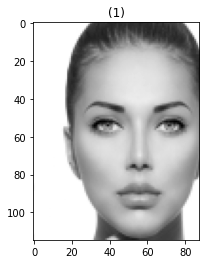

[1.]


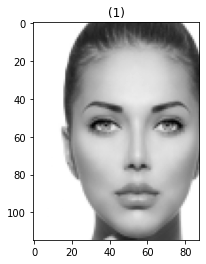

[1.]


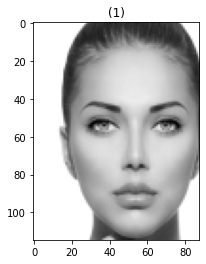

[1.]


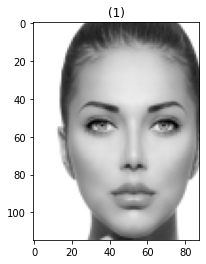

[1.]


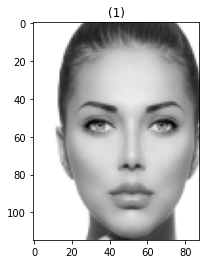

[1.]


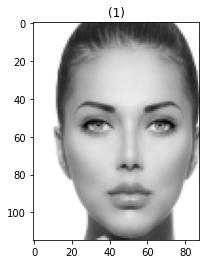

[1.]


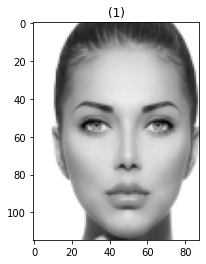

[1.]


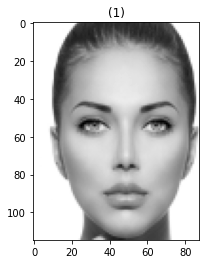

[1.]


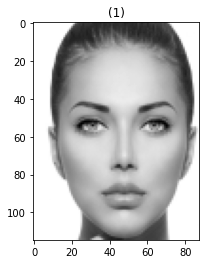

[1.]


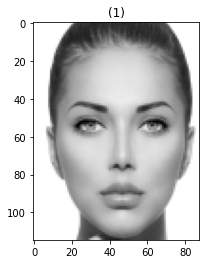

[1.]


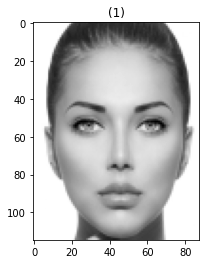

[1.]


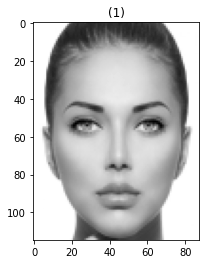

[1.]


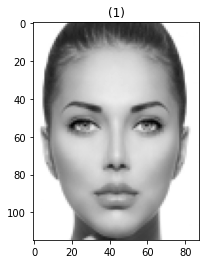

[1.]


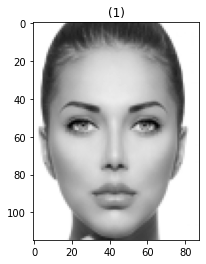

[1.]


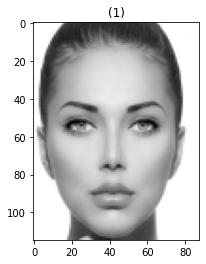

[1.]


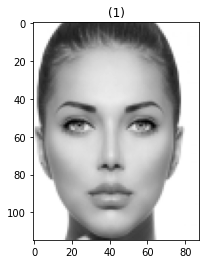

[1.]


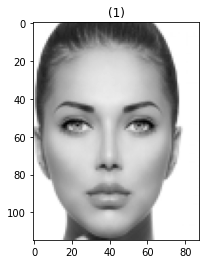

[1.]


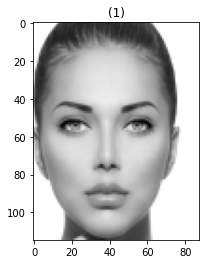

[1.]


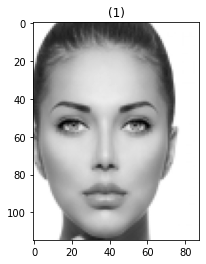

[1.]


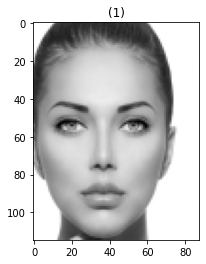

[1.]


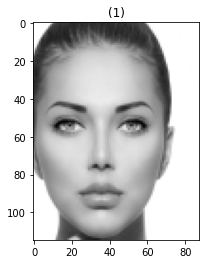

[1.]


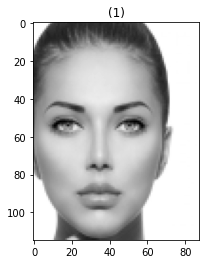

[1.]


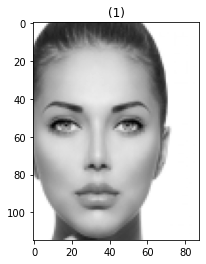

[1.]


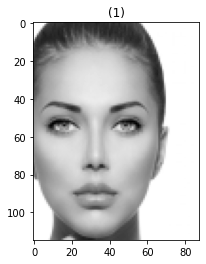

[1.]


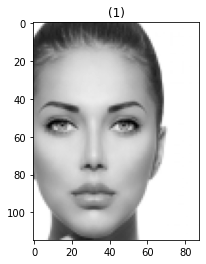

[1.]


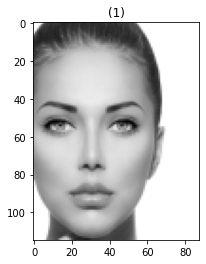

[1.]


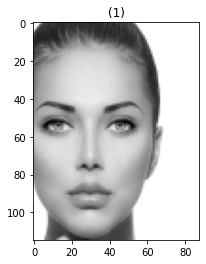

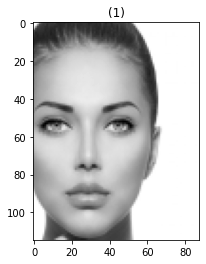

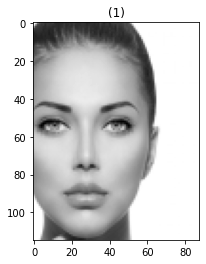

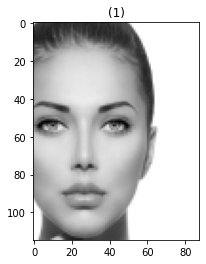

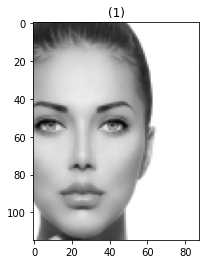

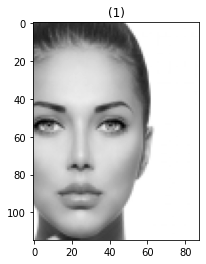

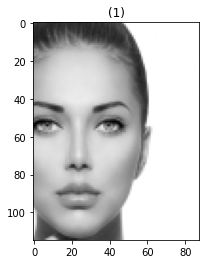

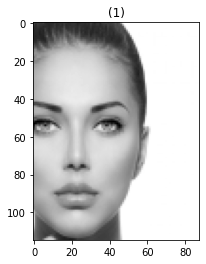

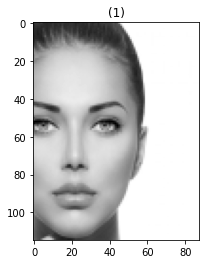

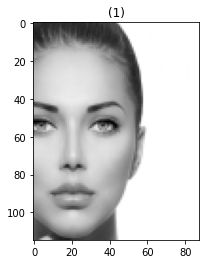

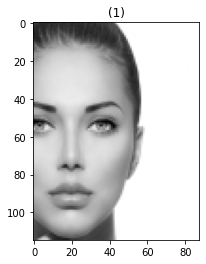

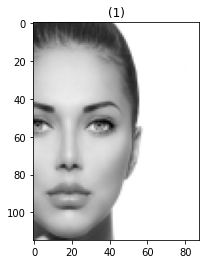

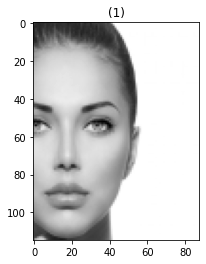

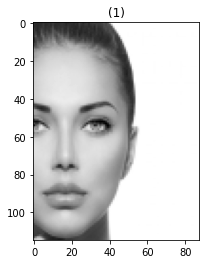

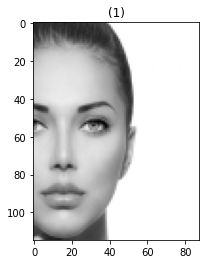

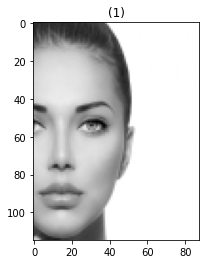

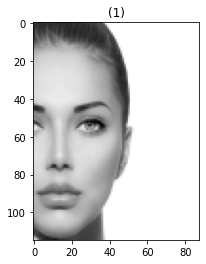

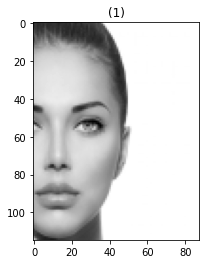

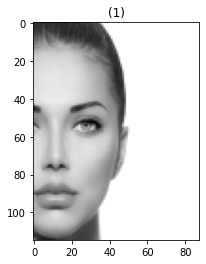

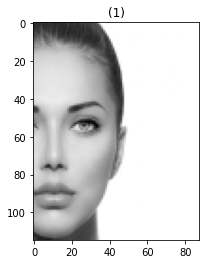

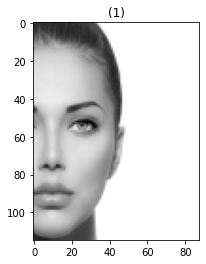

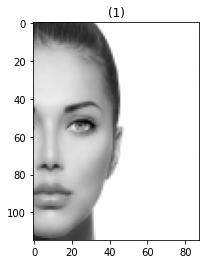

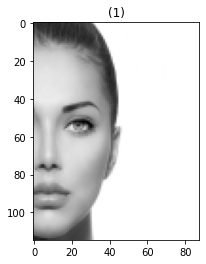

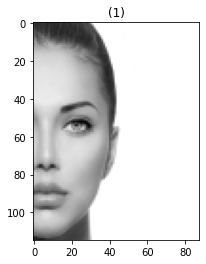

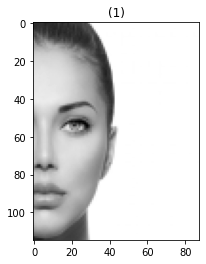

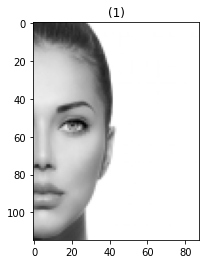

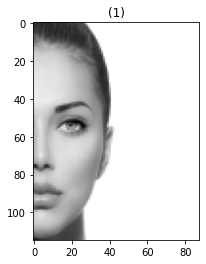

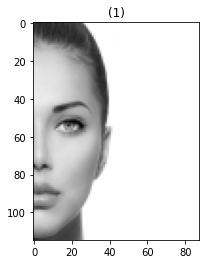

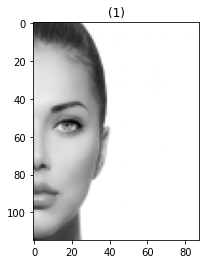

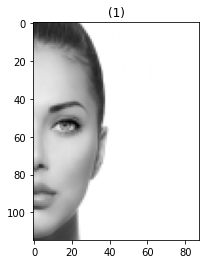

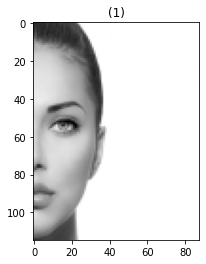

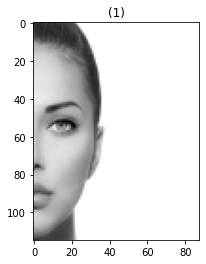

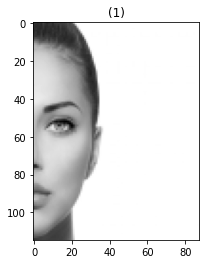

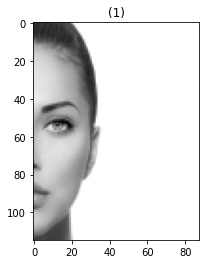

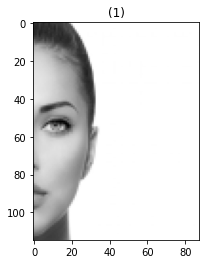

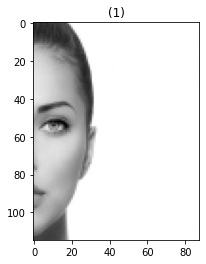

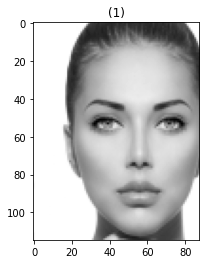

[1.]


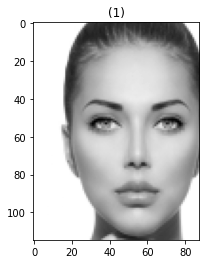

[1.]


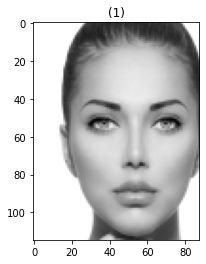

[1.]


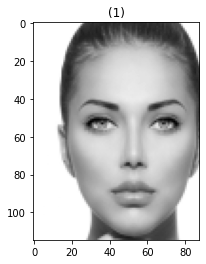

[1.]


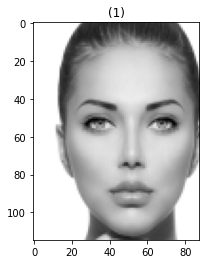

[1.]


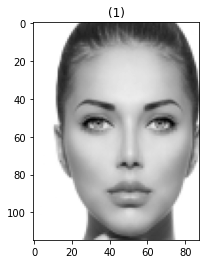

[1.]


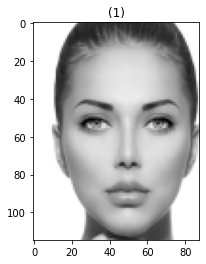

[1.]


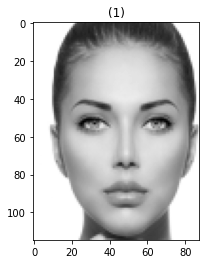

[1.]


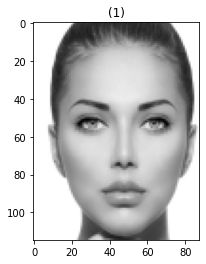

[1.]


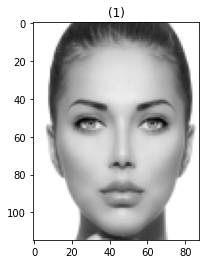

[1.]


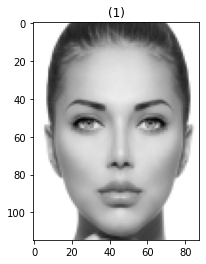

[1.]


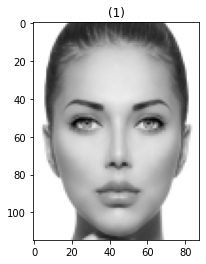

[1.]


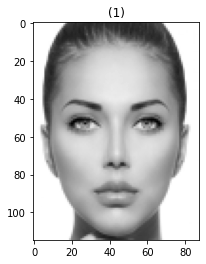

[1.]


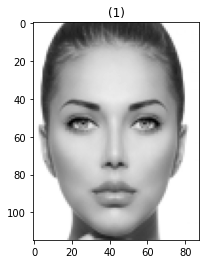

[1.]


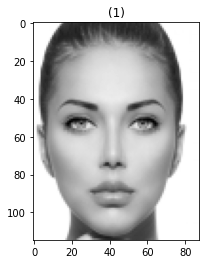

[1.]


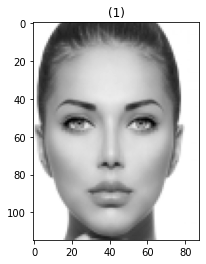

[1.]


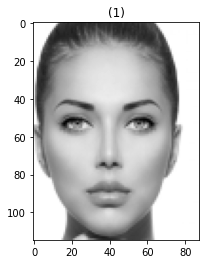

[1.]


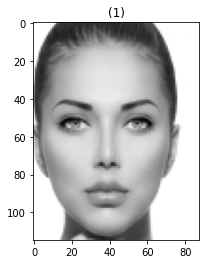

[1.]


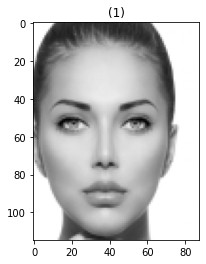

[1.]


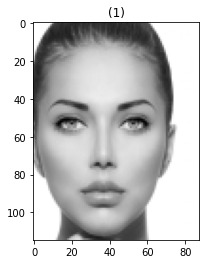

[1.]


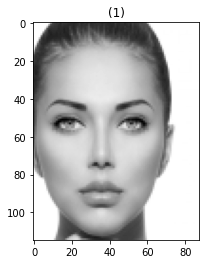

[1.]


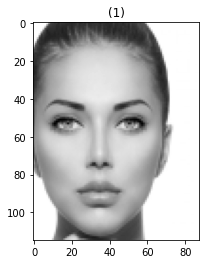

[1.]


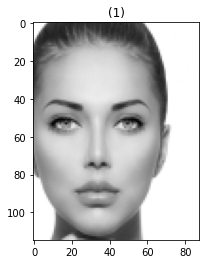

[1.]


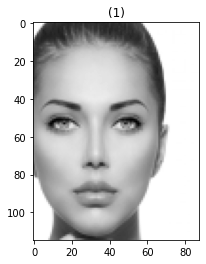

[1.]


KeyboardInterrupt: 

In [36]:
search_for_face(cv2.resize(rgb2gray(io.imread('test_images\woman.jpg')), (150,150), interpolation = cv2.INTER_AREA),1.3,1.7,1)